In [ ]:
import pandas as pd

# Load the tab-delimited file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepatic_counts_normalized_pt_2.txt', sep='\t')

# Display the first few rows of the data to ensure it's loaded correctly
data.head()

FileNotFoundError: ignored

In [ ]:
# Rename the column
data.rename(columns={'Unnamed: 0': 'cell_state'}, inplace=True)

# Display the first few rows to confirm the change
data.head()

,cell_state,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,E75_1_AAATGCCGTCGAACAG-1,0.0,0.0,0.0,0.0,0.903261,0.0,1.204348,0.301087,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301087,0.000000,0.0,0.0
1,E75_1_AACCATGTCTAACCGA-1,0.0,0.0,0.0,0.0,0.854628,0.0,1.424380,0.854628,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.284876,0.000000,0.0,0.0
2,E75_1_AACCGCGGTGTGCCTG-1,0.0,0.0,0.0,0.0,2.461639,0.0,1.230820,0.410273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.410273,0.0,0.0
3,E75_1_AAGACCTAGTCCATAC-1,0.0,0.0,0.0,0.0,0.277223,0.0,1.386117,0.831670,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,E75_1_ACACCCTGTTGTTTGG-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.779727,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
filtered_data = data[~data['cell_state'].str.startswith(('E75', 'E85'))]
filtered_data.head()


,cell_state,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
359,E95_1_AAACGGGTCCTAGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,3.320526,0.474361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
360,E95_1_AAAGCAAAGCAGATCG-1,0.0,0.0,0.0,0.0,0.0,0.0,1.405481,2.108222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.702741,0.702741,0.0,0.0
361,E95_1_AAAGTAGGTAGGAGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.437197,1.311590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
362,E95_1_AAAGTAGGTGCCTGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.223840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
363,E95_1_AACCGCGGTGAGTATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.461595,0.461595,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
from sklearn.impute import KNNImputer

# Define the imputer
imputer = KNNImputer(n_neighbors=5) # You can adjust the number of neighbors if needed

# Assuming 'cell_state' is a categorical feature, drop it temporarily for imputation
temp_data = filtered_data.drop('cell_state', axis=1)

# Impute the data
imputed_data = imputer.fit_transform(temp_data)

# Convert imputed data back to dataframe and reattach 'cell_state'
imputed_df = pd.DataFrame(imputed_data, columns=temp_data.columns)
imputed_df['cell_state'] = filtered_data['cell_state'].reset_index(drop=True)


In [ ]:
filtered_data['cell_state'] = filtered_data['cell_state'].str[:3]
filtered_data.head()

,cell_state,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
359,E95,0.0,0.0,0.0,0.0,0.0,0.0,3.320526,0.474361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
360,E95,0.0,0.0,0.0,0.0,0.0,0.0,1.405481,2.108222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.702741,0.702741,0.0,0.0
361,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.437197,1.311590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
362,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.223840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
363,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.461595,0.461595,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
filtered_data = filtered_data[~filtered_data['cell_state'].isin(['E75', 'E85'])]


## KNN Imputation: A Comprehensive Overview

**Problem** There were missing values in the original data set marked as NaN, these cells cannot be used for processing the data. Thus we will impute (or fill in) these data by a sophisticated- but well known method desribed below

### What is KNN Imputation?

KNN (K-Nearest Neighbors) Imputation is a method employed to fill in missing values in our dataset. Instead of filling missing values with a generic measure like the mean, median, or mode, KNN imputation identifies 'k' number of neighboring observations and uses them to estimate the missing values.

### How Does it Work?

1. **Distance Measurement**: For a given observation with a missing value, the method calculates the distance between this observation and all other observations for the available data points. The distance is usually measured using methods like Euclidean distance.

2. **Neighbor Selection**: Once distances are calculated, 'k' observations that are closest to the observation with the missing value are selected. Here, 'k' is a predetermined number.

3. **Value Estimation**: The method then estimates the missing value based on the values of these 'k' neighbors. A simple approach might be to take an average of these neighbors.

### Why Did We Use KNN Imputation?

1. **Sophistication Over Basic Methods**: While mean or median imputation applies a single value to all missing data points, KNN is more nuanced, considering the specific characteristics of an observation to estimate its missing values.

2. **Preservation of Data Distribution**: As KNN imputation derives values from actual observations rather than a central tendency measure, it is likely to preserve the original distribution of the dataset.

3. **Flexibility**: KNN can be used for both numerical and categorical data, making it versatile.

4. **Reduced Data Loss**: Instead of discarding observations with missing values, KNN imputation allows us to retain and utilize these observations, making the most of the data we have.

### Caveats

- **Computational Intensity**: KNN Imputation can be computationally expensive, especially for large datasets, as it requires distance calculations for each observation with missing values. Hence, it's important to ensure that the chosen 'k' and the dataset size are manageable.

- **Choice of 'k'**: The number of neighbors, 'k', needs to be chosen judiciously. A small 'k' might be sensitive to outliers, while a large 'k' might blur the distinctions between observations.

In our research, given the importance of ensuring our data is as complete and accurate as possible, utilizing KNN imputation was a vital step to optimize our dataset for subsequent analyses.


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # Adjust neighbors as needed

# Drop 'cell_state' temporarily for imputation
temp_data = filtered_data.drop('cell_state', axis=1)

imputed_data = imputer.fit_transform(temp_data)

# Convert imputed data back to dataframe and reattach 'cell_state'
imputed_df = pd.DataFrame(imputed_data, columns=temp_data.columns)
imputed_df['cell_state'] = filtered_data['cell_state'].reset_index(drop=True)


In [ ]:
from sklearn.decomposition import PCA

X = imputed_df.drop('cell_state', axis=1)

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X)


In [ ]:
growth_phenotype = [
    "Crb2", "Crb1", "Pard3", "Pard6a", "Pard6g", "Pard6b", "Prkcz", "Prkci", "Patj", "Pals1",
    "Amot", "Yap1", "Wwtr1", "Cdh1", "Limd1", "Ajuba", "Wtip", "Nf2", "Wwc1", "Frmd1",
    "Frmd6", "Sav1", "Stk3", "Rassf6", "Rassf1", "Ppp2ca", "Ppp2cb", "Ppp2r1b", "Ppp2r1a", "Ppp2r2a",
    "Ppp2r2b", "Ppp2r2c", "Ppp2r2d", "Lats2", "Lats1", "Mob1a", "Mob1b", "Ppp1ca", "Ppp1cb", "Ppp1cc",
    "Tp53bp2", "Llgl2", "Llgl1", "Scrib", "Dlg1", "Dlg2", "Dlg3", "Dlg4", "Dlg5", "Csnk1d",
    "Csnk1e", "Tptep2-csnk1e", "Btrc", "Fbxw11", "Tp73", "Bbc3", "Tead1", "Tead4", "Tead3", "Tead2",
    "Ccn2", "Gli2", "Areg", "Birc5", "Afp", "Itgb2", "Fgf1", "Tgfb1", "Tgfb2", "Tgfb3",
    "Tgfbr1", "Tgfbr2", "Smad7", "Smad2", "Smad3", "Smad4", "Serpine1", "Bmp2", "Bmp4", "Bmp5",
    "Bmp6", "Bmp7", "Bmp8b", "Bmp8a", "Gdf5", "Gdf6", "Gdf7", "Amh", "Bmpr1a", "Bmpr1b",
    "Bmpr2", "Smad1", "Id1", "Id2", "Wnt1", "Wnt2", "Wnt2b", "Wnt3", "Wnt3a", "Wnt4",
    "Wnt5a", "Wnt5b", "Wnt6", "Wnt7a", "Wnt7b", "Wnt8a", "Wnt8b", "Wnt9a", "Wnt9b", "Wnt10b",
    "Wnt10a", "Wnt11", "Wnt16", "Fzd1", "Fzd7", "Fzd2", "Fzd3", "Fzd4", "Fzd5", "Fzd8", "Fzd6", "Fzd10", "Fzd9",
    "Dvl3", "Dvl2", "Dvl1", "Ywhaz", "Ywhab", "Ywhaq", "Ywhae", "Ywhah", "Ywhag",
    "Gsk3b", "Ctnnb1", "Apc", "Apc2", "Axin1", "Axin2", "Nkd1", "Nkd2", "Tcf7", "Tcf7l1",
    "Tcf7l2", "Lef1", "Myc", "Ccnd1", "Ccnd2", "Ccnd3", "Sox2", "Snai2", "Birc2", "Birc3",
    "Actg1", "Actb", "Ctnna3", "Ctnna1", "Ctnna2", "Abi2", "Abi3", "Acvrl1", "Alox15b",
    "Ang", "Angptl3", "Azu1", "Bcar1", "Bmp10", "Calca", "Ccdc88a", "Cd24", "Cd2ap",
    "Cd34", "Cdh13", "Cdk5r1", "Centd3", "Cklf", "Clic4", "Cntn4", "Cx3cl1", "Dock2",
    "Dpysl5", "Egfr", "Enpep", "Fez1", "Fez2", "Gdnf", "Gtpbp4", "Hmgcr", "Il10", "Il12a",
    "Il12b", "Il8", "Il8rb", "Itgb1", "Itgb1bp1", "Kal1", "Krt2", "Lamb1", "Lamc1", "Mdga1",
    "Mia3", "Myh9", "Nexn", "Nf1", "Nrd1", "Nrp1", "Nrp2", "Nrtn", "Nrxn1", "Nrxn3", "Ophn1",
    "Otx2", "Parp9", "Pf4", "Plg", "Ppap2a", "Ppap2b", "Prss3", "Pten", "Rtn4", "S100a2", "S100p",
    "Saa1", "Scg2", "Scye1", "Sema3b", "Sema4f", "Sftpd", "Shh", "Shroom2", "Siah1", "Slit1",
    "Slit2", "Sphk1", "Spon2", "Syk", "Tbx5", "Tdgf1", "Thbs4", "Thy1", "Tnfsf12", "Tnn", "Trip6",
    "Ubb", "Unc5c", "Vcl", "Vegfc", "Abl1", "Acvr1", "Adamts16", "Agt", "Agtr1a", "Agtr1b",
    "Agtr2", "Ahr", "Angpt1", "Ar", "B4galt1", "Bcl2", "Casr", "Cav3", "Ccl11", "Cd44", "Celsr1",
    "Cited1", "Cited2", "Col4a1", "Csf1", "Csmd1", "Ctnnbip1", "Ctsd", "Ctsh", "Ctsl", "Cxcl12",
    "Cxcr4", "Dag1", "Dchs1", "Ddr1", "Dicer1", "Dll4", "Dspp", "Edn1", "Ednra", "Egf", "Eng",
    "Epha2", "Esr1", "Esrp1", "Esrp2", "Etv4", "Etv5", "Ext1", "Eya1", "Fat4", "Fgf2", "Fgf8",
    "Fgf10", "Fgfr2", "Fkbpl", "Flt1", "Foxa1", "Foxa2", "Foxc2", "Foxd1", "Foxf1", "Gbx2", "Gdf2",
    "Gli3", "Gna13", "Gpc3", "Greb1l", "Grem1", "Gzf1", "Hhex", "Hhip", "Hmga2", "Hnf1b", "Hoxa5",
    "Hoxa11", "Hoxb7", "Hoxd11", "Igf1", "Ihh", "Ilk", "Kdm5b", "Kdr", "Kras", "Lama1", "Lama5",
    "Lgr4", "Lhx1", "Lrp5", "Lrp6", "Maged1", "Mdk", "Med1", "Met", "Mgp", "Mks1", "Mmp14", "Msx2",
    "Mycn", "Ncoa3", "Nfatc1", "Nfatc3", "Nfatc4", "Nkx3-1", "Nog", "Notch1", "Notch4", "Npnt",
    "Nrarp", "Pak1", "Pax2", "Pax8", "Pbx1", "Pdgfra", "Pgf", "Pgr", "Phb2", "Pitx2", "Pkd1",
    "Pkhd1", "Plxnd1", "Pml", "Ppp3r1", "Pspn", "Ptch1", "Pxn", "Rasip1", "Rbm15", "Rdh10", "Rspo2",
    "Sall1", "Sema3e", "Sema5a", "Sfrp2", "Sirt6", "Six1", "Six2", "Six4", "Slc12a2", "Smo", "Sox8",
    "Sox9", "Spry1", "Spry2", "Src", "Srf", "Stk4", "Tacstd2", "Tbx1", "Tbx2", "Tbx3", "Tbx20",
    "Tcf21", "Tek", "Tfap2c", "Tie1", "Timeless", "Tmem67", "Tmtc3", "Tnc", "Tnf", "Vangl2", "Vdr",
    "Vegfa", "Wt1", "Cdkn", "Cdkn2b", "Fst", "Lefty1", "Acvr1c", "Comp", "Crebbp", "Dcn", "E2f4", "E2f5", "Ep300",
    "Amhr2", "Id3", "Id4", "Ifng", "Inhba", "Inhbb", "Inhbc", "Rhoa", "Ltbp1", "Smad5",
    "Smad6", "Smad9", "Nodal", "Mapk1", "Mapk3", "Smurf1", "Rbl1", "Rbl2", "Rock1", "Rps6kb1",
    "Rps6kb2", "Smurf2", "Skp1", "Sp1", "Tfdp1", "Lefty2", "Thbs1", "Thbs2", "Thbs3", "Skp1p2",
    "Inhbe", "Cul1", "Chrd", "Acvr2a", "Acvr2b", "Zfyve9", "Rock2", "Zfyve16", "Rbx1", "Frat1",
    "Nfat5", "Wif1", "Chp1", "Csnk1a1l", "Prickle1", "Csnk1a1", "Csnk2a1", "Csnk2a2", "Csnk2b",
    "Ctbp1", "Ctbp2", "Prickle2", "Dkk1", "Daam1", "Plcb1", "Frat2", "Daam2", "Cacybp", "Dkk4",
    "Dkk2", "Jun", "Mmp7", "Nfatc2", "Nlk", "Plcb2", "Plcb3", "Plcb4", "Ppard", "Ppp2r5a",
    "Ppp2r5b", "Ppp2r5c", "Ppp2r5d", "Ppp2r5e", "Ppp3ca", "Ppp3cb", "Ppp3cc", "Ppp3r2", "Prkaca",
    "Prkacb", "Prkacg", "Prkca", "Prkcb", "Prkcg", "Mapk8", "Mapk9", "Mapk10", "Prkx", "Psen1",
    "Chd8", "Rac1", "Rac2", "Rac3", "Senp2", "Chp2", "Sfrp1", "Sfrp4", "Sfrp5", "Sox17", "Porcn",
    "Map3k7", "Tbl1x", "Tp53", "Tbl1xr1", "Cxxc4", "Fosl1", "Camk2a", "Camk2b", "Camk2d",
    "Camk2g", "Vangl1", "Ruvbl1", "Tbl1y", "Cer1"
]

In [ ]:
maturation_phenotype = [
    "C3", "Apob", "Serpina1", "Slc39a14", "Hp", "Col18a1", "Cps1", "Serpina3", "Tmem176b",
    "Apoh", "Slc7a2", "Rrbp1", "Apoa2", "Clu", "A2m", "Aldh4a1", "Apoe", "Acsl1", "Alb",
    "Xbp1", "Hpd", "Cfh", "Dusp1", "Dhcr24", "Rbp4", "Cd81", "Glud1", "Ptp4a1", "Itih2",
    "Ahsg", "Igfbp4", "Rarres2", "Fga", "Ephx1", "C1r", "Apoa1", "Asgr1", "Abat", "Cfb",
    "Serping1", "Pebp1", "Scp2", "Aldh2", "Tf", "Anpep", "Aldh6a1", "Fgg", "Serpinf2", "Agt",
    "Pdia4", "Hspd1", "Scd", "St6gal1", "Errfi1", "Aldob", "Sdc1", "Itih4", "Akr1c1", "Igf2",
    "Cpb2", "Furin", "Orm1", "Cluh", "Fgb", "Itih1", "Ptprf", "Atf5", "C8a", "Apoc1", "Cfi",
    "Gatm", "Ces1", "Vtn", "Cers2", "Aox1", "Ang", "Rhob", "Kng1", "Ambp", "Azgp1", "Krt8",
    "Sod1", "C4bpa", "Itih3", "Mt1g", "C5", "C1s", "Gpx3", "H6pd", "Echs1", "Serpinf1", "Ass1",
    "Cyb5a", "Insig1", "Plg", "Pcsk6", "Cyp4f3", "Apoc3", "Mt1x", "Ifitm3", "Orm2", "F2",
    "Cpn2", "Asgr2", "Adi1", "Agxt", "Aco1", "Acaa2", "Hpx", "Cd14", "Tmem176a", "Serpina10",
    "Sephs2", "Lrg1", "Idh1", "Myo1b", "Apmap", "Igfbp3", "Kdelr2", "Abca1", "Abhd2", "Ttr",
    "Aldh1a1", "Fgl1", "Tat", "Mat1a", "Masp1", "Acadsb", "Krt18", "Cyp8b1", "Serpinc1",
    "Steap3", "Apoc2", "Ell2", "Baat", "Sdc2", "Hmgcs2", "Insr", "Proc", "Pgrmc1", "Pc", "Gamt",
    "Asl", "Pros1", "Mgst1", "Prox1", "Aldh1l1", "Fasn", "Pah", "Tfpi", "A1bg", "Slc38a4",
    "Arg1", "Akr1c2", "Ttc38", "C8b", "Cyp27a1", "Lbp", "Mt2a", "Ftcd", "Man1a1", "Cp", "Adh1b",
    "Oaf", "Ptgr1", "Mt1e", "Dhrs3", "Lonp2", "Ivd", "Ormdl3", "F9", "Scarb1", "Gpam", "Angptl3",
    "Hrg", "Slc13a5", "G6pc", "Hpn", "Creb3l3", "Acaa1", "Shmt1", "Cd302", "Prg4", "Bhmt2", "C6",
    "Lpin2", "Cldn1", "Acox1", "Crat", "Gc", "Fbp1", "Nadk", "Igfbp1", "Alas1", "Pck1", "Serpina6",
    "Habp2", "Msmo1", "C2", "F12", "Zkscan1", "Ppara", "C7", "Il1r1", "Pnkd", "Dsp", "Nipsnap1",
    "Farp1", "Egfr", "Tfr2", "Linc00261", "Mst1", "Ppp2r1b", "Slc9a3r2", "Dcaf11", "Ly6e", "Hnf4a",
    "Abcc2", "Ces2", "C1rl", "Cfhr1", "Mccc2", "Sord", "A1cf", "Plin4", "Fabp1", "Mlxipl", "Ugt2b4",
    "Cbs", "Dhtkd1", "Ak4", "Cxcl12", "Lrp5", "Dgat2","Hyal1", "Apcs", "Erlin1", "Ppp1r3b",
    "Etfb", "Ggcx", "Dcxr", "Serpind1","Agpat2", "Slc23a2", "Slc9a3r1", "Maob", "Pck2", "C9",
    "Papss2", "Hal", "Tst", "Mettl7a", "Cryz", "Mpst", "Cideb", "Rdh16", "Smim14", "Ttc39c", "Erbb3",
    "Acads", "Igfbp2", "Scap", "Lsr", "Slco2b1", "Pygl", "Acsm2b", "Grhpr",
    "Slc35d1", "Tp53inp1", "Saa4", "F5", "Acacb", "Qprt", "Slc25a47", "Sult2a1",
    "Fah", "Syvn1", "Slc30a1", "Sik2", "Bsdc1", "Reep6", "Ugdh", "Apol1",
    "Aldh8a1", "Prap1", "Dhcr7", "Aspg", "Masp2", "Hsd17b2", "Slc27a5", "Gjb1",
    "Cyp2e1", "Bhmt", "Plglb2", "Hmgcl", "Mylk", "Nnmt", "F7", "Serpina5",
    "C4bpb", "Pbld", "C1orf115", "Pcyt2", "Acsm2a", "Slc31a1", "Cebpd",
    "Slc25a1", "Ehhadh", "Slc43a1", "Cgnl1", "Stard10", "Hgd", "Ephx2",
    "Rnase4", "Crp", "Maoa", "Sds", "Pipox", "Vkorc1", "Hsd17b6", "Hpr", "Ddt",
    "Cyp3a4", "Perp", "Mgat4b", "Tgm2", "Gpt2", "Gldc", "Slc27a2", "Efna1",
    "Slc25a25", "Apoa5", "Gckr", "Vav2", "Tsku", "Akr1c3", "Serpina4", "Cryl1",
    "Tdo2", "Gne", "Cdo1", "Nupr1", "Pcbd1", "Phyh", "Adh1a", "Abhd14b", "Sntb1",
    "Cyp4a11", "Ablim3", "Acy1", "Slc43a3", "Plin5", "Entpd5", "Aqp9", "Dpys",
    "Ptpn3", "Hagh", "Acat1", "Bok", "Tmprss6", "Afm", "Smoc1", "Psat1", "Rcan1",
    "Hsd11b1", "Croccp2", "Acsl5", "Spryd4", "Adh4", "Cdh1", "Comt", "Dusp16",
    "Slc22a7", "Vwa1", "Alad", "Clptm1l", "Serpina11", "Abcd3", "Abcc9", "Tspan9",
    "Lepr", "Khk", "Isoc2", "Mbl2", "Saa1", "Hsd3b7", "Msrb1", "Aig1", "Shmt2",
    "Slc25a13", "Rora", "F10", "Lpcat3", "Sc5d", "Mttp", "Carhsp1", "Nr1h4",
    "Aldh5a1", "Shroom1", "Dhodh", "Nadk2", "Gadd45b", "Cdc42ep1", "G0s2", "Sorbs2",
    "Hamp", "Tpst2", "Por", "Sfxn1", "Aadac", "Sardh", "Gramd4", "Vnn1", "Col27a1",
    "C11orf54", "C8g", "Cyp2c9", "Serinc2", "Cyp2d6", "Syt7", "Nr2f6", "Slc2a2",
    "Cebpa", "Rtkn", "Ugt1a1", "Apof", "Pmpca", "Hao1", "Bdh1", "Chpf", "Dnajb9",
    "Afmid", "Hgfac", "Acsm5", "Ldhd", "Inhbe", "Cbr1", "Chrd", "Xdh", "Fmo3",
    "Atg2a", "Chdh", "Adh6", "Plxnb1", "Rnf152", "Ghr", "Tm4sf4", "Tmem205",
    "Acp2", "Plekha6", "Kifc3", "Apom", "Etnk2", "Prdx4", "Itga1", "Ugt2b7", "Pxdc1",
    "Rcl1", "Cyp4f11", "F11", "Phgdh", "Ogdhl", "Mmp15", "Slc47a1", "Glyctk",
    "S100a16", "Cobll1", "Gcgr", "Enpp1", "Fahd2a", "Cfhr3", "Rab43", "Sult1a1",
    "Dmgdh", "Zdhhc9", "Rprd1b", "Fzd5", "Slc22a1", "Nav2", "Gprc5c", "Aldh1b1",
    "Pctp", "Plglb1", "Selenbp1", "Colec11", "Ar", "Mbnl3", "Fmo5", "Pdzk1",
    "Acadvl", "Epb41l5", "Eci1", "Mettl7b", "Phf8", "Sigmar1", "Phka2", "Srebf1",
    "Ranbp10", "Ptms", "Ttpal", "Ern1", "Slco1b1", "Npc1l1", "Abcb4", "Nme4", "Pid1",
    "Klf15", "Apoc4", "Cyp3a5", "Pcca", "Atp2b2", "Rorc", "Tcea3", "Hsd17b10", "Baiap2", "Saa2",
    "Slc25a42", "Gpx2", "Etfdh", "Epb41l4b", "Slc35c1", "Capn5", "Upb1", "Serpina7", "Mthfs",
    "Cpt2", "Gpd1", "Cxcl2", "Cyp4f2", "Osgin1", "Siah2", "Fgfrl1", "Ss18l1", "Fndc4", "Tspan6",
    "Bgn", "Cyp4a22", "Acmsd", "Ppargc1a", "Rgn", "Ugt1a4", "Nrbp2", "Lcat", "Dtx4", "Gchfr",
    "Arsd", "Gpt", "Fgfr3", "Sall1", "Slc46a1", "Echdc3", "Hao2", "Sult1b1", "Serpine1", "Slc25a10",
    "Rdh10", "Armc6", "Tnfsf14", "Agtr1", "Homer2", "Nfil3", "Cth", "Slc25a18", "Glyatl1", "Cacfd1",
    "Cyp2c8", "Adcy1", "Adk", "Hdac6", "Fgfr4", "Angptl4", "Acot2", "Mocs1", "Slc28a1", "Hlf", "Slc16a2",
    "Gfod2", "Lipc", "Slc22a3", "Larp1b", "Cdh2", "Oplah", "Gda", "Hbb", "Klc4", "Steap4", "Slc2a10",
    "Znhit1", "Pglyrp2", "Cyp2c18", "Slco1b3", "Igfals", "Baiap2l1", "Klkb1", "Txnrd2", "Akr1c4",
    "Uroc1", "C11orf24", "C16orf70", "Lpa", "Gys2", "Pitpnm2", "Slc5a6", "Hhex", "Tbx3", "Slc6a1",
    "Ugt2b15", "Akr7a3", "Dhrs4", "Csad", "Spr", "Mettl21a", "Ugt2b10", "Pnpo", "Isoc1", "Hpgd",
    "Elovl6", "Kmo", "Aqp3", "Rbp5", "Srd5a1", "Cfhr5", "Tmem37", "Sec14l2", "Rnf128", "Il1rn",
    "Pxmp2", "Cgn", "Qdpr", "Mcc", "Alpl", "Suox", "Golt1a", "Adamtsl2", "Bcl3", "Cyp2a6", "Pcsk9",
    "Hook1", "Eva1a", "Spon2", "Hibch", "Trib3", "Ano1", "Slc41a2", "Mgmt", "Slc17a2", "Thop1",
    "Sema4g", "Tmem97", "Abcg8", "Clstn3", "Zgpat", "Abcg5", "Hs3st3b1", "Prodh2", "Sdsl", "Slc39a5",
    "Sowahc", "Fbxo17", "Sybu", "Igf1", "Pon3", "Wdr72", "Cyp2b6", "Kcnj8", "Hba2", "Slc25a20",
    "Hdhd3", "Gadd45g", "Slc1a1", "Gnpnat1", "Traf4", "Tmem220", "Mt1f", "Faxdc2", "Agmat", "Cpn1",
    "Mt1m", "Myo7a", "Dhrs4l2", "Pon1", "Fxyd1", "Glyat", "Acss3", "Hsd17b13", "Galm", "Mocos",
    "Cux2", "Dnajc22", "Chi3l1", "Nsun6", "Dio1", "Slc9b2", "Plscr4", "Abhd6", "Fst", "Nhsl1",
    "Agxt2", "Slc10a1", "Mvk", "Slc1a2", "Orai3", "Ceacam1", "Gcdh", "Lipg", "Sepsecs", "Nr5a2",
    "Abca8", "Slc25a15", "Pabpc1l", "Unc5cl", "Fuom", "Wdr59", "Shb", "Il1rap", "Sec11c", "Sptbn2",
    "Acbd4", "Ces3", "C1qtnf1", "Onecut2", "Gfra1", "Lpin3", "Nr1i3", "Ggt5", "Cldn2", "Shpk",
    "Them6", "Amdhd1", "Mfap3l", "Cxadr", "Nr0b2", "Nr1h3", "Pklr", "Pigr", "Depdc7", "Fam83g",
    "Slc25a22", "Cdhr2", "Grtp1", "Lynx1", "Agfg2", "Taco1", "Dusp23", "Gstz1", "Myrf", "Rasd1",
    "Pdia5", "Pank1", "Dnase1l3", "Fcn3", "Etnppl", "Mmab", "Ocln", "Hoga1", "Pecr", "Pdxp", "Fgfr2",
    "Coq4", "Sdf2l1", "Bckdhb", "Tm4sf5", "Osmr", "Inhbc", "Foxa2", "Cyp2j2", "Rabepk", "Ppl",
    "Slc25a16", "Abcb11", "Fam83h", "Mal2", "Rap1gap", "Reln", "Znf444", "Smco4", "Ctps1", "Ggt1",
    "Atp7b", "Il17rc", "Enpep", "Dbh", "Gata4", "Gnmt", "Neu4", "As3mt", "Ttpa", "Ngef", "Irf6", "Adamts2", "Cacna1h", "Sgk2",
    "Prelp", "Msra", "Akr1d1", "Foxa3", "Tmem184a", "Mfsd2a", "Wwc1", "Klb", "Camsap3", "Amacr",
    "Abcc3", "Xpnpep3", "Rhod", "Dok4", "Pemt", "Fancc", "Elf3", "Slpi", "Hgf", "Pnpla3", "Vasn",
    "Lrp3", "Creld2", "Gale", "Proz", "Ppfibp2", "Aifm2", "Tmem45a", "Nags", "C11orf96", "Tpst1",
    "Proser2", "Cfhr4", "Rassf7", "Slc17a4", "Slc17a9", "Ugt1a6", "Amt", "Fam20a", "Haao", "Grem2",
    "Sec16b", "Cish", "Tmprss2", "Otc", "Trpv1", "Gls2", "Ecm1", "Adamts13", "Bphl", "Abca6",
    "Glt1d1", "Cyp1a2", "Leap2", "Galk1", "Spp2", "Lect2", "Gltpd2", "Scml1", "Clybl", "Myo5b",
    "Smlr1", "Mamdc4", "Trim66", "Lhpp", "Linc01018", "Cfhr2", "Pth1r", "Thnsl2", "Linc00174",
    "Nit1", "Ugt1a9", "Tom1l1", "Aoc3", "Mt1h", "F13b", "Kdm8", "Tenm1", "Lrrc3", "Abcc6", "Decr2",
    "Rnd1", "Nr1i2", "St7", "Alg3", "Adra1a", "Smo", "Agap9", "Ngfr", "Hnf1a", "Ajuba", "Foxa1",
    "Esrp2", "Mmachc", "Bche", "Sigirr", "Kcnd3", "Slc2a8", "Ripk4", "Ugt1a3", "C1orf226", "Abca9",
    "Prrg4", "Agmo", "Chst13", "Oit3", "Tm7sf2", "Gch1", "Anks4b", "Cers4", "Inmt", "Fcn2", "Arl4d",
    "Rbp1", "Gphn", "Flvcr2", "Ccdc125", "Slc19a1", "Palm3", "Armc5", "Pmm1", "Chn2", "Thrsp",
    "Ttc36", "Slc37a4", "Exoc3l4", "Avpi1", "Slc22a18", "Acot12", "Shc2", "Gcat", "Ccdc152", "Gpc6",
    "Dnajc12", "Acox2", "Acsm3", "Gjb2", "Stap2", "Btd", "Sh2d4a", "Iyd", "Plin1", "Chpt1", "Apoa4",
    "Pfkfb1", "Gusb", "Marveld2", "Kctd21", "Sat2", "Kcnk5", "Rab17", "Avpr1a", "Mtfr1", "C4orf19",
    "Tmem53", "Ecm2", "Fam110c", "Stab2", "Plekha4", "Apba1", "Nuggc", "Art4", "Blnk", "Shf", "Asb13",
    "Ebpl", "Hyi", "Lactb2", "Slc15a1", "Rph3al", "Slc26a1", "Muc3a", "Lad1", "Scly", "Ccs", "Rfng",
    "Tmem175", "Tbx15", "Defb1", "Ddtl", "Espn", "Arhgef5", "Phyhd1", "Pla2g12b", "Gdf7", "Syt12",
    "C8orf82", "Aspdh", "Gpld1", "Eps8l2", "Mpped1", "Mt1a", "Aqp7", "Pex11a", "Linc01146", "Gsta2",
    "Trpm8", "Nat2", "Tigd2", "Tshz2", "Vnn3", "Clec4g", "Hacl1", "Gper1", "Bco2", "Mmaa", "Syt17",
    "Tdrp", "Xylb", "Fn3k", "Fam149a", "Cyp39a1", "Zfpm1", "Shh", "Igsf9", "Angptl6", "Sec14l4",
    "Cyp4f12", "Ccdc3", "Fggy", "Vil1", "Gata6", "Vipr1", "Samd5", "Tgds", "Slc23a1", "Jmjd8",
    "Cdk10", "Ifrd2", "Ebp", "Aadat", "Sptlc3", "Dao", "Tmem82", "Arhgef26", "Pigv", "Esr1",
    "Acadl", "Cldn14", "Gbp7", "Clec4m", "Hsd17b8", "Thpo", "Mfsd3", "Ca5a", "Adamtsl3", "Cyp21a2",
    "Slc16a13", "Faah", "Ptprh", "Tpd52l1", "Tcaim", "Elovl2", "Aspscr1", "Echdc2", "Rgs14", "Tube1",
    "Amn", "Crhbp", "Ntn1", "Chrna4", "Zfhx4", "Olfm2", "Elfn1", "Pla1a", "Sfxn5", "Mfsd9", "Klhl25", "Slc6a12",
    "Slc22a9", "Sult1a2", "Oxer1", "Myrip", "Colec10", "Rtn4rl2", "Usp35", "Mlph", "Rhpn2", "Hint2",
    "Grhl1", "Gipc2", "Slc51a", "Il17rb", "Lurap1l", "Anxa9", "Slc13a3", "Cmtm8", "Six5", "Cldn3",
    "Thnsl1", "Dmrta1", "Linc01093", "Cited4", "Nat8", "Plekha7", "Prss8", "Aspn", "Cd1d", "Gramd1c",
    "Gas2", "Abcg2", "Rgpd2", "Lrrc61", "Wnk3", "Hcn3", "Ugt2a3", "Tex30", "Atoh8", "Exph5", "Acot1",
    "Slc17a1", "Lrrc45", "St3gal6", "L3mbtl4", "Actr3c", "Capn12", "Lrp5l", "Prlr", "Paqr9",
    "Trim55", "Shank2", "Wnt3", "Fbxo2", "Adamts17", "Gcsh", "Acy3", "Pzp", "Ocel1", "Ddc", "Vwce",
    "Hsd17b14", "Parp16", "Sox5", "Alkbh2", "Scube1", "Frrs1", "Pcolce", "Dnajc25", "Pkhd1",
    "Tmem45b", "Fmo4", "Slc17a3", "Rbks", "Ankrd24", "Gsdmb", "Thap7", "Cyp3a7", "Mogat3", "Cblc",
    "Nudt7", "Tmem177", "Chad", "Pik3c2g", "Pde11a", "Znf385b", "Il18r1", "Cdk3", "Dio3os", "Coq6",
    "Tm6sf2", "Gsta1", "Zbed6cl", "Rdh5", "Fkbp11", "Hnf4g", "Dab1", "Slc6a13", "Dhrs12", "Shbg",
    "Lamc3", "Epha1", "Gyg2", "Rtp3", "Idnk", "Rgpd1", "Inhbb", "Ackr2", "Tmem30b", "Bbox1", "Acot4",
    "Sowahb", "Cyp1a1", "Ccl21", "Txnrd3", "Kif12", "Rps6kb2", "Lgals4", "Linc00939", "Slc2a9",
    "Stx1b", "Cyp2c19", "Gpr146", "Sstr1", "Fut6", "Slc19a3", "Uts2b", "Foxred1", "Crb3", "Trabd2b",
    "Dtx1", "Nudt8", "Sult1e1", "Gpr37", "Atad3c", "Clrn3", "Enpp7", "Xpnpep2", "Onecut1", "Dhrs2",
    "Hand2", "Entpd8", "Sprn", "Trim15", "Sdr42e1", "Ipo4", "Ubxn10", "C2orf72", "Cda", "Cradd",
    "Trpv4", "Zg16", "Nudt6", "Usp43", "Cnga1", "Cldn23", "Clec1b", "Fgf21", "Ece2", "Aqp11", "Odf3b",
    "Steap1", "Ugt3a1", "Tbxa2r", "Znhit2", "Pga3", "Ush2a", "Plek2", "Krt13", "Dhrs1", "Adra1b",
    "Klhdc7a", "Tjp3", "Cndp1", "Ggact", "Spink1", "Slc6a16", "Panx2", "Accs", "Pnma6a", "Grb7",
    "Fetub", "Epo", "Il22ra1", "Ppp1r3g", "Rab26", "Lime1", "Gstt2b", "Mogat2", "C11orf52", "Cel",
    "Notum", "Ovgp1", "Sugct", "Chmp4c", "Hsbp1l1", "Znf563", "Tnfrsf11b", "Sfrp5", "Pdf", "Chst9",
    "Muc6", "Cd5l", "Slc7a9", "Znf684", "Cryaa", "Cyp2a7", "Comtd1", "Faah2", "Ugt2b17", "Tprg1",
    "Tnk1", "Sytl5", "Asb9", "Pex11g", "Znf511", "C17orf107", "Hapln4", "Nrtn", "Linc00987",
    "Slc12a8", "Il27", "Fam151a", "Tslp", "Spata41", "Dact2", "Rnf165", "Lcn2", "Cyp4f22", "Dcaf4l1",
    "Muc5b", "Prr22", "Tmprss9", "Ces4a", "Kcnt2", "Fads6", "Tmem86b", "Cetp", "Necab2", "Sele",
    "Linc00313", "Adhfe1", "Kctd14", "Cyp7b1", "Linc00671", "Grb14", "Igsf23", "Slc5a9", "Ncmap",
    "Slitrk3", "Adcy10", "Gp2", "Npw", "Lhx2", "Galt", "Ism1", "Cyp17a1", "Trim10", "Dpm2", "Ccl19",
    "Ttbk1", "Mia2", "Ctage4", "Tmco6", "Gpr88", "Ugt2b11", "Zyg11a", "Chrdl2", "Fam163b", "Hepacam",
    "Folh1", "Akr1b10", "Cyp7a1", "Unc93a", "Hepn1", "Hsd17b3", "Aoc2", "Syne4", "Crip3", "Znf837",
    "Lrrc8e", "Ctage8", "Chst4", "Linc00574", "Glud2", "Anxa13", "Spata6l", "Bcl2l10", "Gpr182",
    "Myo16", "Krt5", "Slc22a25", "Lgsn", "Ntf3", "Dsg1", "Nlrp6", "Prr18", "Tmem139", "Efna2",
    "C12orf60", "Myo15a", "Scgb2b2", "Gpr39", "Slc16a11", "Linc00242", "Lbx2", "Tmem238", "Slfnl1",
    "Ccdc38", "Il1rl2", "C2orf16", "Krt1", "Krt6a", "P4ha3", "Smim1", "Cldn9", "Arid3c", "Ggh",
    "Slc22a10", "Cpb1", "Rgpd3", "Tg", "C8orf49", "Agbl2", "Pgc", "Cyp3a43", "Rdh12", "Tmem105",
    "Zglp1", "Upp2", "Sprr3", "Mtcp1", "Cyp11a1", "C1orf53", "Linc00870", "Btbd16", "Prss1", "Syt9",
    "Tnn", "Oxt", "Rgl3", "Abcc11", "Tcp10l", "Ripply1", "Linc00606", "Acsm1", "Pcsk4", "Cpa1",
    "Chrne", "Slc30a10", "Gmnc", "Bmp10", "Slco1b7", "Timd4", "Foxq1", "Mrap", "Fam9b", "Armc12",
    "Tmed6", "Dcdc1", "Reg1a", "Mogat1", "Stk19", "C9orf43", "Gjc3", "Tgm3", "Gck", "Pga5", "Soat2",
    "Tppp2", "Calca", "Crnn", "Lrcol1", "Pnlip", "Tspear", "C16orf95", "Krt4", "Arsf", "Ugt2a1",
    "Krt14", "Ces5a", "Bhlha15", "Cldn22", "Mip", "Linc01124", "Klk4", "Sec14l3", "Tgfbr3l",
    "Linc00885", "Tle6", "Vsig10l", "Prg2", "Spdyc", "Pla2g1b", "Syce2", "Linc00319", "Pga4",
    "Cela3a", "Evpll", "Golga6a", "Cyp2a13", "Glod5", "Ccdc13", "Ctrb1", "Krt2", "Skor2", "Cyp26a1",
    "Adh7", "Cela3b", "Lipf", "Kiss1", "Sbsn", "Ccdc158", "Trim29", "Acot6", "Ctrb2", "Allc",
    "Serpina12", "C9orf163", "Dnmt3l", "Atoh7", "Tlx1", "Linc00896", "Or13a1", "Clps", "Mroh2a",
    "Crybb3", "Cyp11b1", "Ttll2", "Krt6b", "Dcst2", "Tectb", "Prl", "Ugt1a5", "Th", "Reg1b", "Krt16",
    "Cga", "Gh1", "Ugt1a7" "Gdpd4", "Iapp", "Nbpf6", "Hormad2", "Cpa2", "Mt1b", "Crct1", "Sprr2a", "Gnrh2", "Fbxw10", "Ca9",
    "Bpifb2", "Cela2a", "Slc45a2", "Fbxo39", "Znf648", "Rfpl4a", "Sprr1b", "Amy2a", "Ivl", "Krt6c",
    "Calml5", "Prm2", "Gnat1", "Krtdap", "Slc25a52", "Golga6b", "C10orf62", "Kpna7", "Golga6d",
    "Tekt5", "Capza3", "Omp", "Sprr2e", "Sycn", "Gkn1", "Padi1", "Prm1", "Ceacam16", "Spic", "Lcn12",
    "Sprr2d", "Rnase13", "Pramef10", "Cela2b", "Muc7", "Slc22a24", "Ins", "Mt1hl1", "Kprp", "Pnliprp1",
    "Slurp1", "Fam187b", "Rfpl4al1", "Tnp1", "Rbpjl", "Fam170a", "Cyp11b2", "Xage3", "Gsta5", "Cxorf66",
    "Pramef15", "Spata8"
]

In [ ]:
TF_list = [
    "Sox17", "Nes", "Pax6", "Sox2", "Notch1", "Nr5a1", "Rfx4", "Sox9", "Hes1", "Smad1", "Sox4", "Sox18",
    "Klf7", "Sp8", "Pitx2", "Cdh1", "Klf4", "Ovol1", "Ocln", "Gsc", "Gata1", "Gata2", "Eomes", "Twist1",
    "Nkx2-5", "Mixl1", "Snai2", "Foxf1", "Hand1", "Foxc1", "Runx2", "Twist2", "Tbx6", "Snai1", "Ar", "Arid3c",
    "Atf5", "Atoh7", "Atoh8", "Bhlha15", "Cebpa", "Cebpd", "Creb3l3", "Cux2", "Dmrta1", "Elf3", "Esr1", "Fam170a",
    "Foxa1", "Foxa2", "Foxa3", "Foxq1", "Gata4", "Gata6", "Grhl1", "Hand2", "Hhex", "Hlf", "Hnf1a", "Hnf4a",
    "Hnf4g", "Irf6", "Klf15", "L3mbtl4", "Lbx2", "Lhx2", "Mlxipl", "Myrf", "Nfil3", "Nkx1-1", "Nr1h3", "Nr1h4",
    "Nr1i2", "Nr1i3", "Nr2f6", "Nr5a2", "Onecut1", "Onecut2", "Ppara", "Prox1", "Rbpjl", "Rora", "Rorc", "Sall1",
    "Six5", "Skor2", "Sox5", "Spic", "Srebf1", "Tbx15", "Tbx3", "Thap7", "Tigd2", "Tlx1", "Tshz2", "Xbp1", "Zfhx4",
    "Zfpm1", "Zglp1", "Zgpat", "Zkscan1", "Znf385b"
]


In [ ]:
missing_genes = [gene for gene in growth_phenotype if gene not in imputed_df.columns]
print("Missing genes:", missing_genes)



Missing genes: ['Pals1', 'Frmd1', 'Tp53bp2', 'Tptep2-csnk1e', 'Tp73', 'Ccn2', 'Alox15b', 'Azu1', 'Cd24', 'Centd3', 'Il8', 'Il8rb', 'Kal1', 'Ppap2a', 'Ppap2b', 'S100p', 'Scye1', 'Siah1', 'Cdkn', 'Skp1', 'Skp1p2', 'Csnk1a1l', 'Prkacg', 'Tp53', 'Tbl1y']


In [ ]:
valid_genes = [gene for gene in growth_phenotype if gene in imputed_df.columns]
growth_data = imputed_df[valid_genes]


**PCA on growth_phenotype with valid genes**

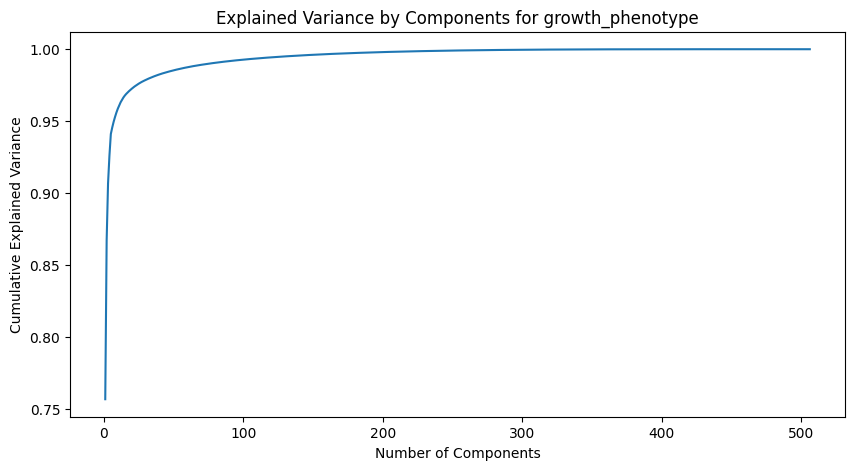

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Using valid genes from growth_phenotype
growth_data = imputed_df[valid_genes]

pca_growth = PCA().fit(growth_data)

# Plot the explained variance by each component
plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca_growth.explained_variance_ratio_)+1), pca_growth.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components for growth_phenotype')
plt.show()


**PCA for maturation_phenotype**

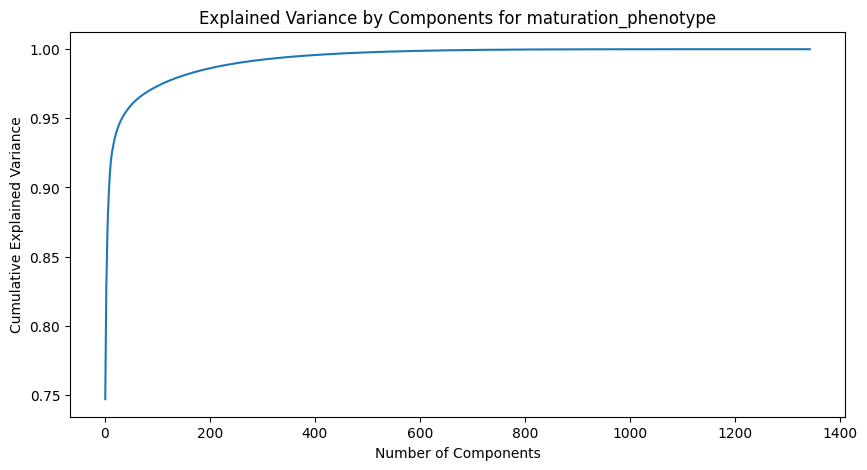

In [ ]:
valid_maturation_genes = [gene for gene in maturation_phenotype if gene in imputed_df.columns]
maturation_data = imputed_df[valid_maturation_genes]

pca_maturation = PCA().fit(maturation_data)

# Plot explained variance for maturation phenotype
plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca_maturation.explained_variance_ratio_)+1), pca_maturation.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components for maturation_phenotype')
plt.show()


In [ ]:
# For growth_phenotype
import numpy as np
cumulative_variance_growth = np.cumsum(pca_growth.explained_variance_ratio_)
n_components_growth = np.argmax(cumulative_variance_growth >= 0.95) + 1  # +1 because numpy is 0-indexed

# For maturation_phenotype (you'll need to calculate the cumulative variance for it similarly)
cumulative_variance_maturation = np.cumsum(pca_maturation.explained_variance_ratio_)
n_components_maturation = np.argmax(cumulative_variance_maturation >= 0.95) + 1


In [ ]:
# Growth_Phenotype and maturation phenotype PCA

pca_growth = PCA(n_components=n_components_growth)
pca_maturation = PCA(n_components=n_components_maturation)

growth_transformed = pca_growth.fit_transform(growth_data)
maturation_transformed = pca_maturation.fit_transform(maturation_data)


###  let's aim to retain PCs that together explain at least 95% of the total variance for both growth_phenotype and maturation_phenotype.

## Principal Component Analysis (PCA) on RNAseq Data

### Purpose of PCA:
PCA was performed on the RNAseq dataset to achieve the following objectives:

- **Dimensionality Reduction**: Our initial dataset consists of gene expression levels across multiple genes. By employing PCA, we can reduce the number of genes (features) we need to consider, making subsequent analyses more computationally efficient and potentially reducing the risk of overfitting in modeling.

- **Data Visualization**: Reducing the dataset to two or three principal components allows us to visualize it in 2D or 3D space. This can provide insights into the relationships and structures within the data that are not easily discernible in higher dimensions.

### Interpretation of Principal Components:
In PCA, the principal components (PCs) are new variables derived from the original data that capture its variance in descending order:

- **PC1**: Represents the direction of maximum variance in the original data. In the context of our RNAseq data, it captures the gene expression patterns that explain the largest portion of the variability among samples.
  
- **PC2**: Represents the second largest direction of variance, orthogonal to PC1. It captures the next most significant pattern of gene expression variability.

It's important to note that while PCs are linear combinations of the original genes, they don't have a direct biological interpretation. Instead, they serve to capture the underlying structure in the data.

### Feature Selection based on PCA:
Post PCA, genes (columns) will be selected or removed based on their contributions to the selected principal components. Genes that have low loadings (coefficients) on the retained PCs can be considered as having less influence on the variability captured by those PCs. As such, these genes can be candidates for removal. Conversely, genes with high absolute loadings are those that significantly influence the PCs, indicating their importance in capturing the dataset's variance.

By focusing on genes that have high contributions to the principal components, we can work with a reduced yet representative set of genes for downstream analyses or modeling.


In [ ]:
# For growth_phenotype
cumulative_variance_growth = np.cumsum(pca_growth.explained_variance_ratio_)
n_components_growth = np.argmax(cumulative_variance_growth >= 0.95) + 1  # +1 because numpy is 0-indexed

# For maturation_phenotype (assuming you've already calculated pca for maturation_phenotype)
cumulative_variance_maturation = np.cumsum(pca_maturation.explained_variance_ratio_)
n_components_maturation = np.argmax(cumulative_variance_maturation >= 0.95) + 1


In [ ]:
pca_growth = PCA(n_components=n_components_growth)
pca_maturation = PCA(n_components=n_components_maturation)

growth_transformed = pca_growth.fit_transform(growth_data)
maturation_transformed = pca_maturation.fit_transform(maturation_data)


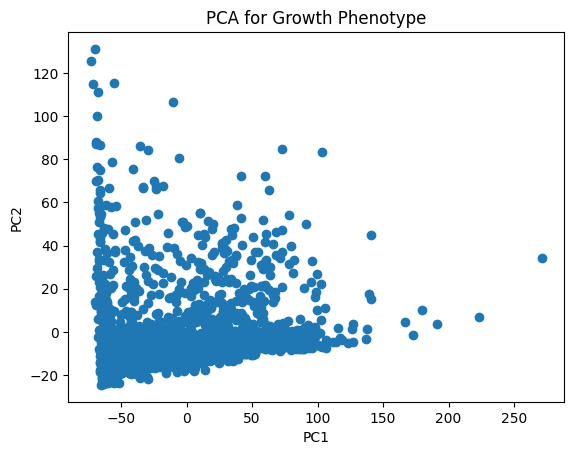

In [ ]:
plt.scatter(growth_transformed[:, 0], growth_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for Growth Phenotype')
plt.show()


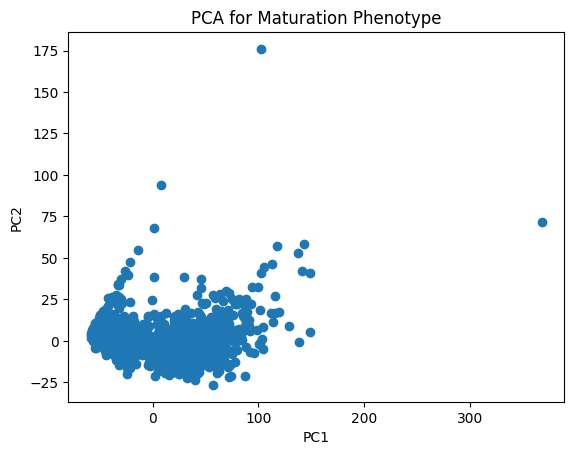

In [ ]:
plt.scatter(maturation_transformed[:, 0], maturation_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for Maturation Phenotype')
plt.show()

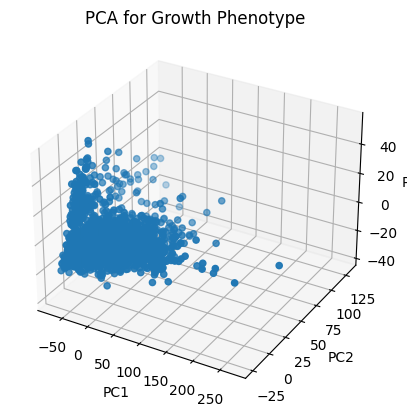

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(growth_transformed[:, 0], growth_transformed[:, 1], growth_transformed[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA for Growth Phenotype')
plt.show()


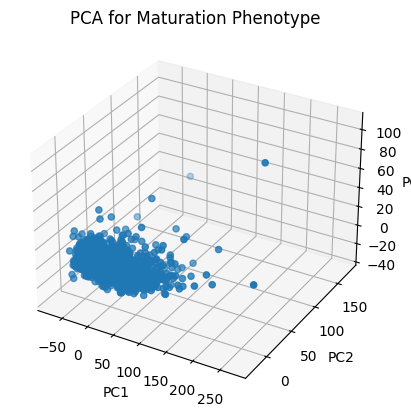

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(growth_transformed[:, 0], maturation_transformed[:, 1], maturation_transformed[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA for Maturation Phenotype')
plt.show()


### Remove columns from the dataset to reduce the chance for overfitting


For this, I'll set a threshold based on the loadings of the genes on the first few principal components. Genes with loadings below this threshold will be considered as having less influence on the variability captured by the principal components and can be removed.

Here's one approach:

1. For simplicity, let's consider only the loadings on the first two principal components.
2. Compute the average absolute loading for each gene across these components.
3. Set a threshold (e.g., below the median average loading) and remove genes that fall below this threshold.

In [ ]:
# Compute the average absolute loading for each gene across PC1 and PC2
average_loadings_growth = np.abs(pca_growth.components_[:2]).mean(axis=0)
average_loadings_maturation = np.abs(pca_maturation.components_[:2]).mean(axis=0)

# Set a threshold - using median as an example
threshold_growth = np.median(average_loadings_growth)
threshold_maturation = np.median(average_loadings_maturation)

# Get the columns to be removed
cols_to_remove_growth = growth_data.columns[average_loadings_growth < threshold_growth].tolist()
cols_to_remove_maturation = maturation_data.columns[average_loadings_maturation < threshold_maturation].tolist()

# Print removed columns
print("Columns to remove from growth data:", cols_to_remove_growth)
print("Columns to remove from maturation data:", cols_to_remove_maturation)

# Drop the columns from the respective dataframes
reduced_growth_data = growth_data.drop(columns=cols_to_remove_growth)
reduced_maturation_data = maturation_data.drop(columns=cols_to_remove_maturation)





Columns to remove from growth data: ['Crb2', 'Crb1', 'Pard6a', 'Pard6b', 'Wwtr1', 'Limd1', 'Wtip', 'Wwc1', 'Rassf6', 'Ppp2r2c', 'Ppp2r2d', 'Lats2', 'Llgl2', 'Scrib', 'Dlg2', 'Dlg4', 'Dlg5', 'Btrc', 'Fbxw11', 'Bbc3', 'Tead4', 'Tead3', 'Gli2', 'Areg', 'Itgb2', 'Fgf1', 'Tgfb1', 'Tgfbr2', 'Serpine1', 'Bmp2', 'Bmp5', 'Bmp6', 'Bmp8b', 'Bmp8a', 'Gdf5', 'Gdf6', 'Gdf7', 'Amh', 'Bmpr1b', 'Wnt1', 'Wnt2b', 'Wnt3', 'Wnt3a', 'Wnt4', 'Wnt6', 'Wnt7a', 'Wnt7b', 'Wnt8a', 'Wnt8b', 'Wnt9a', 'Wnt9b', 'Wnt10b', 'Wnt10a', 'Wnt11', 'Wnt16', 'Fzd5', 'Fzd8', 'Fzd6', 'Fzd10', 'Fzd9', 'Dvl3', 'Dvl1', 'Apc2', 'Axin1', 'Axin2', 'Nkd2', 'Sox2', 'Birc3', 'Ctnna3', 'Ctnna2', 'Abi3', 'Acvrl1', 'Ang', 'Bcar1', 'Bmp10', 'Calca', 'Cd34', 'Cdh13', 'Cdk5r1', 'Cklf', 'Clic4', 'Cntn4', 'Cx3cl1', 'Dock2', 'Egfr', 'Enpep', 'Fez1', 'Fez2', 'Gdnf', 'Il10', 'Il12a', 'Il12b', 'Itgb1bp1', 'Krt2', 'Mdga1', 'Nrtn', 'Nrxn1', 'Nrxn3', 'Ophn1', 'Otx2', 'Parp9', 'Prss3', 'S100a2', 'Saa1', 'Scg2', 'Sema3b', 'Sema4f', 'Sftpd', 'Slit1', 'Sph

Columns to remove from growth data: ['Crb2', 'Crb1', 'Pard6a', 'Pard6b', 'Wwtr1', 'Limd1', 'Wtip', 'Wwc1', 'Rassf6', 'Ppp2r2c', 'Ppp2r2d', 'Lats2', 'Llgl2', 'Scrib', 'Dlg2', 'Dlg4', 'Dlg5', 'Btrc', 'Fbxw11', 'Bbc3', 'Tead4', 'Tead3', 'Gli2', 'Areg', 'Itgb2', 'Fgf1', 'Tgfb1', 'Tgfbr2', 'Serpine1', 'Bmp2', 'Bmp5', 'Bmp6', 'Bmp8b', 'Bmp8a', 'Gdf5', 'Gdf6', 'Gdf7', 'Amh', 'Bmpr1b', 'Wnt1', 'Wnt2b', 'Wnt3', 'Wnt3a', 'Wnt4', 'Wnt6', 'Wnt7a', 'Wnt7b', 'Wnt8a', 'Wnt8b', 'Wnt9a', 'Wnt9b', 'Wnt10b', 'Wnt10a', 'Wnt11', 'Wnt16', 'Fzd5', 'Fzd8', 'Fzd6', 'Fzd10', 'Fzd9', 'Dvl3', 'Dvl1', 'Apc2', 'Axin1', 'Axin2', 'Nkd2', 'Sox2', 'Birc3', 'Ctnna3', 'Ctnna2', 'Abi3', 'Acvrl1', 'Ang', 'Bcar1', 'Bmp10', 'Calca', 'Cd34', 'Cdh13', 'Cdk5r1', 'Cklf', 'Clic4', 'Cntn4', 'Cx3cl1', 'Dock2', 'Egfr', 'Enpep', 'Fez1', 'Fez2', 'Gdnf', 'Il10', 'Il12a', 'Il12b', 'Itgb1bp1', 'Krt2', 'Mdga1', 'Nrtn', 'Nrxn1', 'Nrxn3', 'Ophn1', 'Otx2', 'Parp9', 'Prss3', 'S100a2', 'Saa1', 'Scg2', 'Sema3b', 'Sema4f', 'Sftpd', 'Slit1', 'Sphk1', 'Spon2', 'Syk', 'Tdgf1', 'Thbs4', 'Thy1', 'Tnfsf12', 'Tnn', 'Vegfc', 'Acvr1', 'Adamts16', 'Agt', 'Agtr1a', 'Agtr1b', 'Agtr2', 'Ahr', 'Ar', 'Casr', 'Cav3', 'Ccl11', 'Cd44', 'Celsr1', 'Csf1', 'Csmd1', 'Ctsh', 'Cxcr4', 'Dchs1', 'Dll4', 'Dspp', 'Edn1', 'Ednra', 'Egf', 'Eng', 'Epha2', 'Esr1', 'Etv4', 'Etv5', 'Ext1', 'Eya1', 'Fat4', 'Fgf2', 'Fgf8', 'Fkbpl', 'Foxc2', 'Foxd1', 'Gbx2', 'Gdf2', 'Gna13', 'Grem1', 'Hhip', 'Hnf1b', 'Hoxa11', 'Hoxd11', 'Ihh', 'Kdr', 'Lama5', 'Lhx1', 'Lrp5', 'Mgp', 'Mks1', 'Nfatc1', 'Nkx3-1', 'Nog', 'Notch4', 'Nrarp', 'Pax2', 'Pax8', 'Pgf', 'Pgr', 'Pkd1', 'Pkhd1', 'Plxnd1', 'Pml', 'Pspn', 'Pxn', 'Rasip1', 'Rdh10', 'Rspo2', 'Sall1', 'Sema3e', 'Six1', 'Six2', 'Six4', 'Sox8', 'Spry1', 'Src', 'Srf', 'Tacstd2', 'Tbx1', 'Tek', 'Tfap2c', 'Tie1', 'Timeless', 'Tmem67', 'Tnf', 'Vdr', 'Cdkn2b', 'Lefty1', 'Acvr1c', 'Comp', 'Amhr2', 'Ifng', 'Inhba', 'Inhbb', 'Inhbc', 'Smad9', 'Nodal', 'Smurf1', 'Rbl2', 'Rps6kb2', 'Lefty2', 'Thbs1', 'Thbs2', 'Thbs3', 'Inhbe', 'Chrd', 'Wif1', 'Prickle1', 'Prickle2', 'Plcb1', 'Frat2', 'Dkk4', 'Mmp7', 'Nfatc2', 'Plcb2', 'Plcb3', 'Ppp2r5b', 'Ppp3cc', 'Ppp3r2', 'Prkca', 'Prkcb', 'Prkcg', 'Mapk10', 'Psen1', 'Rac2', 'Chp2', 'Sfrp4', 'Porcn', 'Fosl1', 'Camk2a', 'Camk2b', 'Camk2g', 'Vangl1', 'Cer1']


Columns to remove from maturation data: ['Hp', 'Cps1', 'Slc7a2', 'Hpd', 'Cfh', 'Ephx1', 'Asgr1', 'Aldh6a1', 'Itih4', 'Orm1', 'Gatm', 'Aox1', 'Ang', 'Azgp1', 'H6pd', 'Pcsk6', 'Orm2', 'Cpn2', 'Adi1', 'Agxt', 'Cd14', 'Lrg1', 'Abhd2', 'Aldh1a1', 'Fgl1', 'Tat', 'Mat1a', 'Cyp8b1', 'Steap3', 'Apoc2', 'Baat', 'Pros1', 'Aldh1l1', 'Fasn', 'A1bg', 'Cyp27a1', 'Cp', 'Ivd', 'F9', 'Gpam', 'Hrg', 'Slc13a5', 'G6pc', 'Prg4', 'C6', 'Cldn1', 'Acox1', 'Crat', 'Fbp1', 'Pck1', 'C7', 'Egfr', 'Tfr2', 'Mst1', 'Abcc2', 'Cfhr1', 'Plin4', 'Lrp5', 'Hyal1', 'Ppp1r3b', 'Slc23a2', 'Pck2', 'C9', 'Papss2', 'Rdh16', 'Ttc39c', 'Slco2b1', 'F5', 'Acacb', 'Slc25a47', 'Sult2a1', 'Syvn1', 'Bsdc1', 'Prap1', 'Aspg', 'Masp2', 'Slc27a5', 'Cyp2e1', 'Mylk', 'Nnmt', 'Serpina5', 'Cebpd', 'Ehhadh', 'Slc43a1', 'Sds', 'Hsd17b6', 'Perp', 'Mgat4b', 'Slc25a25', 'Apoa5', 'Gckr', 'Vav2', 'Tsku', 'Tdo2', 'Nupr1', 'Sntb1', 'Ablim3', 'Plin5', 'Entpd5', 'Aqp9', 'Dpys', 'Ptpn3', 'Hsd11b1', 'Adh4', 'Slc22a7', 'Vwa1', 'Abcc9', 'Lepr', 'Mbl2', 'Saa1', 'Hsd3b7', 'Nr1h4', 'Aldh5a1', 'Shroom1', 'Gadd45b', 'Hamp', 'Sfxn1', 'Sardh', 'Gramd4', 'Ugt1a1', 'Hao1', 'Chpf', 'Afmid', 'Acsm5', 'Ldhd', 'Inhbe', 'Chrd', 'Xdh', 'Fmo3', 'Atg2a', 'Chdh', 'Itga1', 'F11', 'Ogdhl', 'Slc47a1', 'Gcgr', 'Fahd2a', 'Rab43', 'Sult1a1', 'Slc22a1', 'Colec11', 'Ar', 'Fmo5', 'Mettl7b', 'Ern1', 'Npc1l1', 'Abcb4', 'Pcca', 'Atp2b2', 'Rorc', 'Saa2', 'Slc25a42', 'Gpx2', 'Slc35c1', 'Capn5', 'Upb1', 'Serpina7', 'Mthfs', 'Cxcl2', 'Fgfrl1', 'Acmsd', 'Ppargc1a', 'Nrbp2', 'Gpt', 'Fgfr3', 'Sall1', 'Hao2', 'Sult1b1', 'Serpine1', 'Tnfsf14', 'Nfil3', 'Slc25a18', 'Adcy1', 'Fgfr4', 'Mocs1', 'Slc28a1', 'Slc16a2', 'Slc22a3', 'Oplah', 'Gda', 'Steap4', 'Slc2a10', 'Pglyrp2', 'Klkb1', 'Uroc1', 'Pitpnm2', 'Slc6a1', 'Mettl21a', 'Pnpo', 'Hpgd', 'Kmo', 'Aqp3', 'Il1rn', 'Mcc', 'Alpl', 'Golt1a', 'Adamtsl2', 'Trib3', 'Ano1', 'Slc41a2', 'Mgmt', 'Slc17a2', 'Abcg8', 'Clstn3', 'Zgpat', 'Abcg5', 'Fbxo17', 'Sybu', 'Wdr72', 'Kcnj8', 'Slc1a1', 'Tmem220', 'Myo7a', 'Pon1', 'Glyat', 'Hsd17b13', 'Mocos', 'Dio1', 'Slc9b2', 'Plscr4', 'Slc10a1', 'Slc1a2', 'Orai3', 'Ceacam1', 'Lipg', 'Sepsecs', 'Pabpc1l', 'Unc5cl', 'Fuom', 'Il1rap', 'C1qtnf1', 'Lpin3', 'Nr1i3', 'Ggt5', 'Cldn2', 'Shpk', 'Mfap3l', 'Nr0b2', 'Pigr', 'Fam83g', 'Grtp1', 'Lynx1', 'Taco1', 'Dusp23', 'Rasd1', 'Dnase1l3', 'Etnppl', 'Mmab', 'Osmr', 'Inhbc', 'Ppl', 'Slc25a16', 'Abcb11', 'Rap1gap', 'Ggt1', 'Il17rc', 'Dbh', 'Neu4', 'Ngef', 'Adamts2', 'Sgk2', 'Prelp', 'Akr1d1', 'Tmem184a', 'Mfsd2a', 'Wwc1', 'Abcc3', 'Pemt', 'Fancc', 'Elf3', 'Slpi', 'Hgf', 'Pnpla3', 'Vasn', 'Lrp3', 'Aifm2', 'Tmem45a', 'Slc17a4', 'Haao', 'Grem2', 'Sec16b', 'Cish', 'Trpv1', 'Gls2', 'Ecm1', 'Adamts13', 'Abca6', 'Glt1d1', 'Cyp1a2', 'Scml1', 'Clybl', 'Mamdc4', 'Trim66', 'Cfhr2', 'Pth1r', 'Ugt1a9', 'Tom1l1', 'Aoc3', 'F13b', 'Kdm8', 'Tenm1', 'Abcc6', 'Rnd1', 'St7', 'Adra1a', 'Ngfr', 'Kcnd3', 'Abca9', 'Oit3', 'Tm7sf2', 'Anks4b', 'Inmt', 'Arl4d', 'Flvcr2', 'Ccdc125', 'Armc5', 'Chn2', 'Thrsp', 'Acot12', 'Ccdc152', 'Acox2', 'Acsm3', 'Gjb2', 'Plin1', 'Pfkfb1', 'Kctd21', 'Kcnk5', 'Avpr1a', 'Ecm2', 'Fam110c', 'Stab2', 'Plekha4', 'Apba1', 'Nuggc', 'Art4', 'Blnk', 'Shf', 'Slc15a1', 'Rph3al', 'Slc26a1', 'Muc3a', 'Rfng', 'Tmem175', 'Tbx15', 'Defb1', 'Phyhd1', 'Gdf7', 'Syt12', 'Gpld1', 'Mpped1', 'Aqp7', 'Pex11a', 'Gsta2', 'Trpm8', 'Nat2', 'Vnn3', 'Clec4g', 'Hacl1', 'Gper1', 'Bco2', 'Mmaa', 'Syt17', 'Tdrp', 'Fn3k', 'Fam149a', 'Zfpm1', 'Angptl6', 'Ccdc3', 'Fggy', 'Vipr1', 'Slc23a1', 'Sptlc3', 'Dao', 'Pigv', 'Esr1', 'Cldn14', 'Gbp7', 'Adamtsl3', 'Ptprh', 'Tcaim', 'Rgs14', 'Crhbp', 'Ntn1', 'Chrna4', 'Olfm2', 'Elfn1', 'Sfxn5', 'Mfsd9', 'Klhl25', 'Slc6a12', 'Myrip', 'Colec10', 'Rtn4rl2', 'Usp35', 'Mlph', 'Grhl1', 'Slc51a', 'Il17rb', 'Anxa9', 'Slc13a3', 'Six5', 'Dmrta1', 'Cited4', 'Nat8', 'Aspn', 'Gramd1c', 'Lrrc61', 'Hcn3', 'Ugt2a3', 'Atoh8', 'Slc17a1', 'L3mbtl4', 'Capn12', 'Prlr', 'Trim55', 'Wnt3', 'Fbxo2', 'Adamts17', 'Ocel1', 'Hsd17b14', 'Parp16', 'Pkhd1', 'Tmem45b', 'Fmo4', 'Slc17a3', 'Rbks', 'Thap7', 'Nudt7', 'Tmem177', 'Chad', 'Pik3c2g', 'Pde11a', 'Il18r1', 'Tm6sf2', 'Gsta1', 'Hnf4g', 'Lamc3', 'Rtp3', 'Inhbb', 'Ackr2', 'Bbox1', 'Sowahb', 'Cyp1a1', 'Txnrd3', 'Kif12', 'Rps6kb2', 'Lgals4', 'Slc2a9', 'Stx1b', 'Gpr146', 'Sstr1', 'Slc19a3', 'Uts2b', 'Dtx1', 'Nudt8', 'Sult1e1', 'Gpr37', 'Clrn3', 'Enpp7', 'Xpnpep2', 'Dhrs2', 'Entpd8', 'Sprn', 'Trim15', 'Sdr42e1', 'Ubxn10', 'Cda', 'Trpv4', 'Zg16', 'Nudt6', 'Usp43', 'Cnga1', 'Cldn23', 'Clec1b', 'Fgf21', 'Ece2', 'Odf3b', 'Ugt3a1', 'Ush2a', 'Plek2', 'Krt13', 'Adra1b', 'Klhdc7a', 'Tjp3', 'Ggact', 'Slc6a16', 'Panx2', 'Fetub', 'Epo', 'Il22ra1', 'Ppp1r3g', 'Rab26', 'Lime1', 'Cel', 'Notum', 'Ovgp1', 'Sugct', 'Tnfrsf11b', 'Pdf', 'Chst9', 'Muc6', 'Cd5l', 'Cryaa', 'Tnk1', 'Asb9', 'Hapln4', 'Slc12a8', 'Il27', 'Fam151a', 'Tslp', 'Lcn2', 'Muc5b', 'Prr22', 'Tmprss9', 'Ces4a', 'Kcnt2', 'Fads6', 'Necab2', 'Sele', 'Adhfe1', 'Kctd14', 'Cyp7b1', 'Igsf23', 'Slc5a9', 'Ncmap', 'Slitrk3', 'Adcy10', 'Gp2', 'Npw', 'Ism1', 'Cyp17a1', 'Trim10', 'Ccl19', 'Ttbk1', 'Gpr88', 'Zyg11a', 'Chrdl2', 'Fam163b', 'Hepacam', 'Folh1', 'Cyp7a1', 'Unc93a', 'Hsd17b3', 'Aoc2', 'Crip3', 'Lrrc8e', 'Chst4', 'Bcl2l10', 'Myo16', 'Krt5', 'Lgsn', 'Nlrp6', 'Prr18', 'Tmem139', 'Scgb2b2', 'Slc16a11', 'Lbx2', 'Slfnl1', 'Ccdc38', 'Il1rl2', 'Krt1', 'Krt6a', 'Arid3c', 'Cpb1', 'Tg', 'Agbl2', 'Rdh12', 'Zglp1', 'Upp2', 'Sprr3', 'Cyp11a1', 'Btbd16', 'Prss1', 'Syt9', 'Tnn', 'Oxt', 'Rgl3', 'Ripply1', 'Acsm1', 'Pcsk4', 'Chrne', 'Gmnc', 'Bmp10', 'Timd4', 'Mrap', 'Armc12', 'Mogat1', 'Gjc3', 'Tgm3', 'Gck', 'Tppp2', 'Calca', 'Crnn', 'Lrcol1', 'Pnlip', 'Tspear', 'Krt4', 'Ugt2a1', 'Krt14', 'Ces5a', 'Bhlha15', 'Cldn22', 'Mip', 'Klk4', 'Sec14l3', 'Tgfbr3l', 'Vsig10l', 'Prg2', 'Cela3a', 'Glod5', 'Ccdc13', 'Ctrb1', 'Krt2', 'Skor2', 'Cyp26a1', 'Adh7', 'Cela3b', 'Lipf', 'Kiss1', 'Ccdc158', 'Trim29', 'Acot6', 'Allc', 'Serpina12', 'Dnmt3l', 'Atoh7', 'Tlx1', 'Mroh2a', 'Crybb3', 'Cyp11b1', 'Ttll2', 'Krt6b', 'Dcst2', 'Tectb', 'Prl', 'Ugt1a5', 'Th', 'Krt16', 'Cga', 'Iapp', 'Hormad2', 'Cpa2', 'Crct1', 'Fbxw10', 'Bpifb2', 'Cela2a', 'Slc45a2', 'Fbxo39', 'Sprr1b', 'Ivl', 'Prm2', 'Gnat1', 'Krtdap', 'Kpna7', 'Tekt5', 'Capza3', 'Omp', 'Sprr2e', 'Padi1', 'Prm1', 'Ceacam16', 'Spic', 'Lcn12', 'Sprr2d', 'Rnase13', 'Kprp', 'Slurp1', 'Tnp1', 'Rbpjl', 'Fam170a', 'Cyp11b2']


In [ ]:
len(reduced_growth_data.columns) #253 genes from the growth data will be removed because they have the least impact on the results

253

In [ ]:
len(reduced_maturation_data.columns) # 672 genes will be removed from the maturation data set since they have the least impact on the results

673

### Understanding Loading Values in PCA

In the context of Principal Component Analysis (PCA), one often encounters the term "loading values" or simply "loadings". Here's a breakdown of what they represent and their significance:

#### What are Loading Values?

When we perform PCA, the goal is to transform the original data dimensions (e.g., gene expression levels) into a new set of dimensions known as principal components (PCs). Each PC is essentially a linear combination of the original data dimensions. The coefficients (or weights) that determine how much each original dimension contributes to that PC are known as the "loading values".

To be specific:

1. **Weight/Contribution**: Loading values depict the weight or contribution of each original dimension (in your case, genes) to the principal component.

2. **Correlation**: They also represent the correlation between the original dimension and the principal component. A higher absolute value of a loading indicates that the original variable has a strong association with that PC.

#### Why are Loading Values Important?

1. **Interpretability**: Loadings aid in interpreting the significance of each original dimension in the context of the PCs. A gene with a high absolute loading on a particular PC has a significant contribution to the variance captured by that PC.

2. **Variable Importance**: By studying the loading values, one can deduce which dimensions (genes) are most influential in the dataset. Dimensions with higher loadings are more informative than those with lower ones in the context of the variance they explain.

3. **Data Reduction**: As you're aiming to achieve, loadings can guide which genes to keep and which to discard. By focusing on genes with high loadings, you're essentially prioritizing genes that encapsulate most of the variance in the data.

4. **Visualization**: In PCA plots, loadings can be utilized to visualize the importance or influence of each gene on the derived principal components.

In your current analysis, using the loading values helps in discerning which genes are pivotal and which may be considered less informative, thereby streamlining the dataset and retaining only the most salient features.)

# The Statistical Significance of Principal Component Analysis (PCA) in Gene Expression Data

Principal Component Analysis, or **PCA**, is a widely-used statistical method to simplify the complexity in high-dimensional data while retaining trends and patterns. When applied to gene expression data, it's particularly effective for several reasons:

## 1. Dimensionality Reduction
Gene expression datasets often contain expression levels for thousands of genes, many of which may be redundant or irrelevant. PCA allows us to reduce the number of variables (genes) we're working with, making the dataset more manageable, while still preserving the majority of the variation in the data.

## 2. Identifying Patterns
PCA can help us discern patterns in the data that might not be immediately obvious. By transforming the data into the first few principal components, we are essentially viewing the data from the angles that capture the most variance, thus revealing patterns (like grouping or clustering of samples).

## 3. Visualization
High-dimensional data is challenging to visualize. PCA can distill this data into 2 or 3 principal components that can be plotted on a scatter plot, allowing us to visualize and interpret the relationships between samples.

## 4. Noise Reduction
Not all genes contribute meaningful information. Some might just introduce noise. PCA helps in emphasizing variation and bringing out strong patterns, thereby pushing the noise to the last few principal components which can be ignored.

## Rationale for Removing Genes

The genes we often consider for removal based on PCA analysis typically fall into a few categories:

- **Low Variance Genes**: Genes that show little variance across samples are less likely to be informative. Their expression patterns are nearly constant, so they don't contribute much to distinguishing between samples.
  
- **Redundant Genes**: Some genes might be highly correlated, meaning they provide redundant information. PCA can help in identifying and removing such redundancies.
  
- **Noisy Genes**: As mentioned, PCA can help in pushing the noise to the last few components. Genes contributing predominantly to these components might be considered noise.

By removing such genes, we aim to create a more streamlined, focused dataset that emphasizes the most informative genes. This can lead to more robust statistical analyses, clearer visualizations, and more accurate predictive models.

## Conclusion

In essence, PCA is a powerful tool in the genomics toolkit. By understanding and leveraging its strengths, we can extract meaningful insights from vast, complex gene expression datasets.


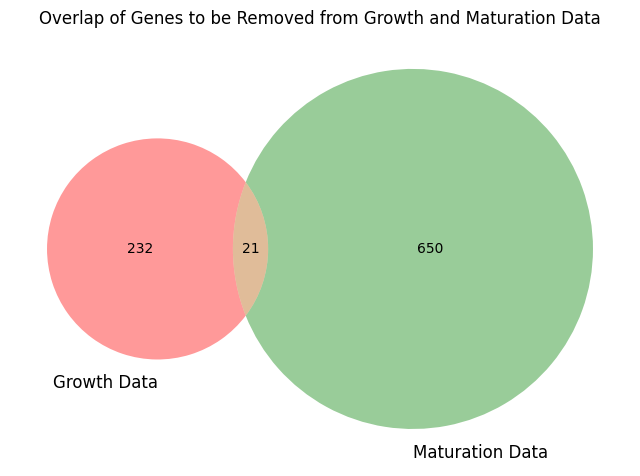

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert lists to sets for the Venn diagram
set_growth = set(cols_to_remove_growth)
set_maturation = set(cols_to_remove_maturation)

plt.figure(figsize=(8,8))
venn2([set_growth, set_maturation], ('Growth Data', 'Maturation Data'))
plt.title('Overlap of Genes to be Removed from Growth and Maturation Data')
plt.show()





## PCA Loadings Scatter Plot Explained

The scatter plot visualizes the relationship between PCA loadings from the `Growth` dataset and the `Maturation` dataset. Each point represents a specific gene's average loading value across the first two principal components from both datasets. Here's how to interpret the visualization:

1. **X-axis (Growth PCA Loadings):** Represents the average absolute loading values of genes across the first two principal components of the `Growth` dataset.
2. **Y-axis (Maturation PCA Loadings):** Represents the average absolute loading values of genes across the first two principal components of the `Maturation` dataset.
3. **Points Above Thresholds:** These are genes whose loadings are above the median threshold for both datasets. They are deemed significant and retained because their loadings indicate they capture substantial variance and hence information in both datasets.
4. **Points Below Thresholds:** These genes fall below the median loading threshold for at least one of the datasets. They are considered less significant in explaining the variance within the datasets and thus are candidates for removal.

The rationale for considering the removal of some genes is to streamline the datasets, focusing only on the genes that contribute most significantly to the variance. This simplification can potentially improve subsequent analyses by reducing noise and dimensionality. Additionally, reducing the number of genes can make computations more efficient and results more interpretable.

The plot provides a visual justification for our decision. Genes that are important in both datasets will appear towards the top right corner, while those less significant for either dataset will gravitate towards the origin.

I hope this provides clarity on our decision-making process. Please let me know if you have further questions or if there's any other information you'd like.



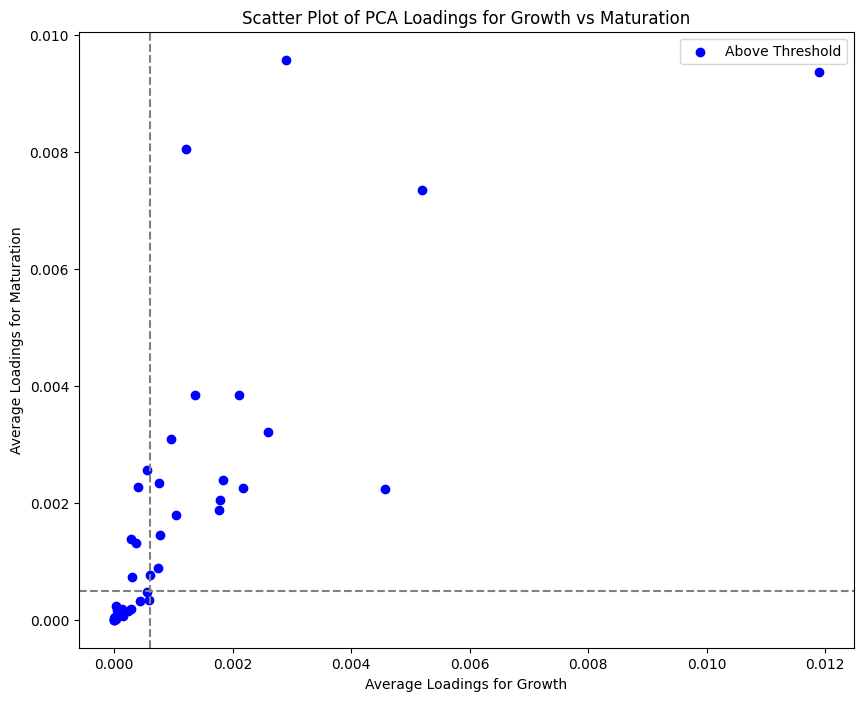

In [ ]:
import numpy as np

# Get all unique genes (assuming gene names are columns in the datasets)
all_genes = set(growth_data.columns).union(set(maturation_data.columns))

# Initialize aligned loadings with default values
aligned_loadings_growth = np.full(len(all_genes), np.nan)
aligned_loadings_maturation = np.full(len(all_genes), np.nan)

# Fill in the average loadings
for idx, gene in enumerate(all_genes):
    if gene in growth_data.columns:
        aligned_loadings_growth[idx] = average_loadings_growth[growth_data.columns.get_loc(gene)]
    if gene in maturation_data.columns:
        aligned_loadings_maturation[idx] = average_loadings_maturation[maturation_data.columns.get_loc(gene)]

# Now plot
plt.figure(figsize=(10, 8))
plt.scatter(aligned_loadings_growth, aligned_loadings_maturation, color='blue', label='Above Threshold')
plt.axhline(y=threshold_maturation, color='gray', linestyle='--')
plt.axvline(x=threshold_growth, color='gray', linestyle='--')
plt.xlabel('Average Loadings for Growth')
plt.ylabel('Average Loadings for Maturation')
plt.legend()
plt.title('Scatter Plot of PCA Loadings for Growth vs Maturation')
plt.show()


### Understanding Loading Values in PCA

In the context of Principal Component Analysis (PCA), one often encounters the term "loading values" or simply "loadings". Here's a breakdown of what they represent and their significance:

#### What are Loading Values?

When we perform PCA, the goal is to transform the original data dimensions (e.g., gene expression levels) into a new set of dimensions known as principal components (PCs). Each PC is essentially a linear combination of the original data dimensions. The coefficients (or weights) that determine how much each original dimension contributes to that PC are known as the "loading values".

To be specific:

1. **Weight/Contribution**: Loading values depict the weight or contribution of each original dimension (in your case, genes) to the principal component.

2. **Correlation**: They also represent the correlation between the original dimension and the principal component. A higher absolute value of a loading indicates that the original variable has a strong association with that PC.

#### Why are Loading Values Important?

1. **Interpretability**: Loadings aid in interpreting the significance of each original dimension in the context of the PCs. A gene with a high absolute loading on a particular PC has a significant contribution to the variance captured by that PC.

2. **Variable Importance**: By studying the loading values, one can deduce which dimensions (genes) are most influential in the dataset. Dimensions with higher loadings are more informative than those with lower ones in the context of the variance they explain.

3. **Data Reduction**: As you're aiming to achieve, loadings can guide which genes to keep and which to discard. By focusing on genes with high loadings, you're essentially prioritizing genes that encapsulate most of the variance in the data.

4. **Visualization**: In PCA plots, loadings can be utilized to visualize the importance or influence of each gene on the derived principal components.

In your current analysis, using the loading values helps in discerning which genes are pivotal and which may be considered less informative, thereby streamlining the dataset and retaining only the most salient features.


In [ ]:
cols_to_remove_growth = growth_data.columns[average_loadings_growth < threshold_growth].tolist()
cols_to_remove_maturation = maturation_data.columns[average_loadings_maturation < threshold_maturation].tolist()


In [ ]:
num_cols_removed_growth = len(cols_to_remove_growth)
num_cols_removed_maturation = len(cols_to_remove_maturation)


In [ ]:
print(f'Number of columns removed from growth data: {num_cols_removed_growth}')
print(f'Number of columns removed from maturation data: {num_cols_removed_maturation}')



Number of columns removed from growth data: 253
Number of columns removed from maturation data: 671


In [ ]:
# Calculate the total number of genes for both phenotypes
total_genes_growth = growth_data.shape[1]
total_genes_maturation = maturation_data.shape[1]

# Calculate the number of genes to be excluded based on PCA analysis
num_cols_removed_growth = len(cols_to_remove_growth)
num_cols_removed_maturation = len(cols_to_remove_maturation)

# Print the results
print("Growth Phenotype:")
print(f"Total Genes: {total_genes_growth}")
print(f"Genes to be Removed: {num_cols_removed_growth}")

print("\nMaturation Phenotype:")
print(f"Total Genes: {total_genes_maturation}")
print(f"Genes to be Removed: {num_cols_removed_maturation}")


Growth Phenotype:
Total Genes: 506
Genes to be Removed: 253

Maturation Phenotype:
Total Genes: 1343
Genes to be Removed: 671


## Refined Dataset Description and Justification

### Introduction

After performing the necessary data pre-processing steps, imputation, and Principal Component Analysis (PCA), we have now derived a refined dataset. This dataset emphasizes on genes that notably contribute to the variability in our data.

### Dataset Composition

- **Rows**: Each row signifies a unique cell. These are identifiable by the `cell_state` parameter in the format `E75_1_ACACCCTGTTGTTTGG-1` and similar structures.
  
- **Columns**: Columns in the refined dataset, other than the `cell_state`, represent the genes. Importantly, we have excluded genes that have low 'loading values' in our PCA analysis. These are genes that do not contribute substantially to the variance across our principal components.

### Justification for the Refined Dataset

1. **Noise Reduction**: By excluding genes with low loading values, we effectively reduce the noise in our dataset, making subsequent analyses potentially more robust.

2. **Dimensionality Reduction**: While the primary aim of PCA isn't always to reduce dimensionality, in this context, by removing genes with minimal influence on variance, we've reduced the complexity of our dataset. This can assist in making subsequent computational analyses faster and more efficient.

3. **Focus on Important Features**: With PCA, we ensure that we are only focusing on genes that have a meaningful impact on the dataset's variance. This can lead to more accurate and interpretable results in downstream analyses.

4. **Avoiding Overfitting**: By removing less influential genes, we reduce the chance of our models picking up on spurious correlations, thereby potentially reducing the risk of overfitting in future modeling tasks.

Moving forward, using this refined dataset will allow us to conduct more streamlined and potentially more accurate analyses, ensuring that the research is based on data that captures the most significant patterns without unnecessary noise.


**Now we can work on this cleaned dataset with KNN imputation for missing values and a reduced number of genes to resrict the possibility of overfitting the data. If that were to occur, we could not have a reliable model**

## Data Pre-processing: The Bedrock of Effective Machine Learning

### Introduction

Before the rise of Machine Learning (ML) and its integration into numerous industries, the adage was "Garbage In, Garbage Out" – highlighting the critical nature of quality input in any computational task. This saying holds even truer for ML, where data is not just input but the foundation upon which models learn and make predictions.

### Why is Data Pre-processing So Important?

1. **Quality Assurance**: Raw data often comes with inconsistencies, errors, and missing values. Pre-processing helps clean this data, ensuring the model learns from accurate and representative information.

2. **Enhancing Model Performance**: ML models can be sensitive to the scale and distribution of data points. Pre-processing techniques like normalization or standardization make sure that all features have the same scale, leading to better performance especially in algorithms that rely on distance measurements, like KNN or SVM.

3. **Feature Engineering**: Not all raw features are useful. Some might be redundant, while others might be better represented in a different format. Pre-processing allows for feature selection and transformation, optimizing the data structure for learning.

4. **Data Reduction**: Large datasets can be computationally intensive for ML models. Pre-processing can help reduce the dimensionality of the data without significant loss of information, using techniques like Principal Component Analysis (PCA).

5. **Handling Missing Data**: ML models require complete datasets to function optimally. Data imputation, a pre-processing step, fills in these gaps, ensuring a comprehensive dataset for training.

6. **Ensuring Model Generalizability**: Pre-processing includes splitting data into training and test sets, which is crucial to evaluate how well a model will perform on unseen data, preventing issues like overfitting.

### Consequences of Ignoring Pre-processing

1. **Poor Model Performance**: Training on raw, unprocessed data can result in models that underperform due to noise, irrelevant features, and inconsistent data scales.

2. **Misleading Insights**: Without proper pre-processing, the insights derived from ML models can be misleading, leading to incorrect conclusions and strategies.

3. **Increased Computational Costs**: Training on high-dimensional, redundant data can be computationally expensive and time-consuming.

### Conclusion

In the realm of Machine Learning, data pre-processing isn't just a preliminary step; it's a pivotal one. It ensures that the foundation upon which models are built is solid, paving the way for reliable, efficient, and insightful outcomes. As we journey through the intricacies of ML, giving due diligence to data pre-processing will always remain a cornerstone of successful implementations.


In [ ]:
# Drop the columns identified by PCA from the filtered_data
reduced_filtered_data = filtered_data.drop(columns=cols_to_remove_growth + cols_to_remove_maturation, errors='ignore')

# Ensure 'cell_state' is the first column
cols = ['cell_state'] + [col for col in reduced_filtered_data if col != 'cell_state']
reduced_filtered_data = reduced_filtered_data[cols]

reduced_filtered_data.head()  # Print the first few rows to verify


,cell_state,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
359,E95,0.0,0.0,0.0,0.0,0.0,0.0,3.320526,0.474361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
360,E95,0.0,0.0,0.0,0.0,0.0,0.0,1.405481,2.108222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.702741,0.702741,0.0,0.0
361,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.437197,1.311590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
362,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.223840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
363,E95,0.0,0.0,0.0,0.0,0.0,0.0,0.461595,0.461595,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


## Reduction of Dimensionality using PCA

### Step-by-Step Process:

#### a. Standardization:

Given a dataset with features $x_1, x_2, \ldots, x_n$, the standardized value \( z \) for a given feature \( x \) is given by:

$$z = \frac{x - \mu}{\sigma} \$$

Where:
- $( \mu )$ is the mean of the feature
- $(\sigma)$ is the standard deviation of the feature

#### b. Compute the Covariance Matrix:

The covariance between two features \( x_i \) and \( x_j \) is given by:

$$\text{Cov}(x_i, x_j) = \frac{1}{n-1} \sum_{k=1}^{n} (x_i^k - \bar{x_i})(x_j^k - \bar{x_j})$$

Where:
- $( n)$ is the number of data points
- $(\bar{x_i})$ and  $\bar{x_j}$ are the means of features $( x_i)$ and $( x_j)$ respectively

The covariance matrix $(Σ)$ for a dataset with $( m)$ features is an \( m × m ) matrix, where the element in the $( i^{th})$ row and $( j^{th})$ column is the covariance between $( x_i)$ and $( x_j)$.

#### c. Find eigenvectors and eigenvalues of the covariance matrix:

For the covariance matrix $(Σ)$, the eigenvector $( v)$ and eigenvalue $( λ)$ satisfy the following equation:

$$Σ v = λ v$$

The eigenvectors represent the directions of maximum variance, and the eigenvalues represent the magnitude of the variance in those directions.

#### d. Select the top k eigenvectors:

After calculating all the eigenvectors and eigenvalues, sort them in decreasing order based on the eigenvalues. The top $( k )$ eigenvectors corresponding to the top $( k )$ eigenvalues are then chosen to form the new feature space.

The new transformed data $( Y )$ is given by:

$$ Y = X × P $$

Where:
- $( X )$ is the original data matrix (after standardization)
- $( P )$ is the matrix with the selected $( k )$ eigenvectors as columns


In [ ]:
growth_genes = ["growth_phenotype"]  # Replace with actual list content
maturation_genes = ["maturation_phenotype"]  # Replace with actual list content




In [ ]:
growth_genes = [gene for gene in growth_genes if gene not in (cols_to_remove_growth + cols_to_remove_maturation)]
maturation_genes = [gene for gene in maturation_genes if gene not in (cols_to_remove_growth + cols_to_remove_maturation)]



In [ ]:
# Check the gene names in your lists
print(growth_genes)
print(maturation_genes)

# Check the first few columns of your dataframe to verify column names
print(filtered_data.columns[:10])  # Print the first 10 columns for verification


['growth_phenotype']
['maturation_phenotype']
Index(['cell_state', 'Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323',
       'Mrpl15', 'Lypla1', 'Gm37988'],
      dtype='object')
